Generating 1x2 (V2 only) combined performance chart...


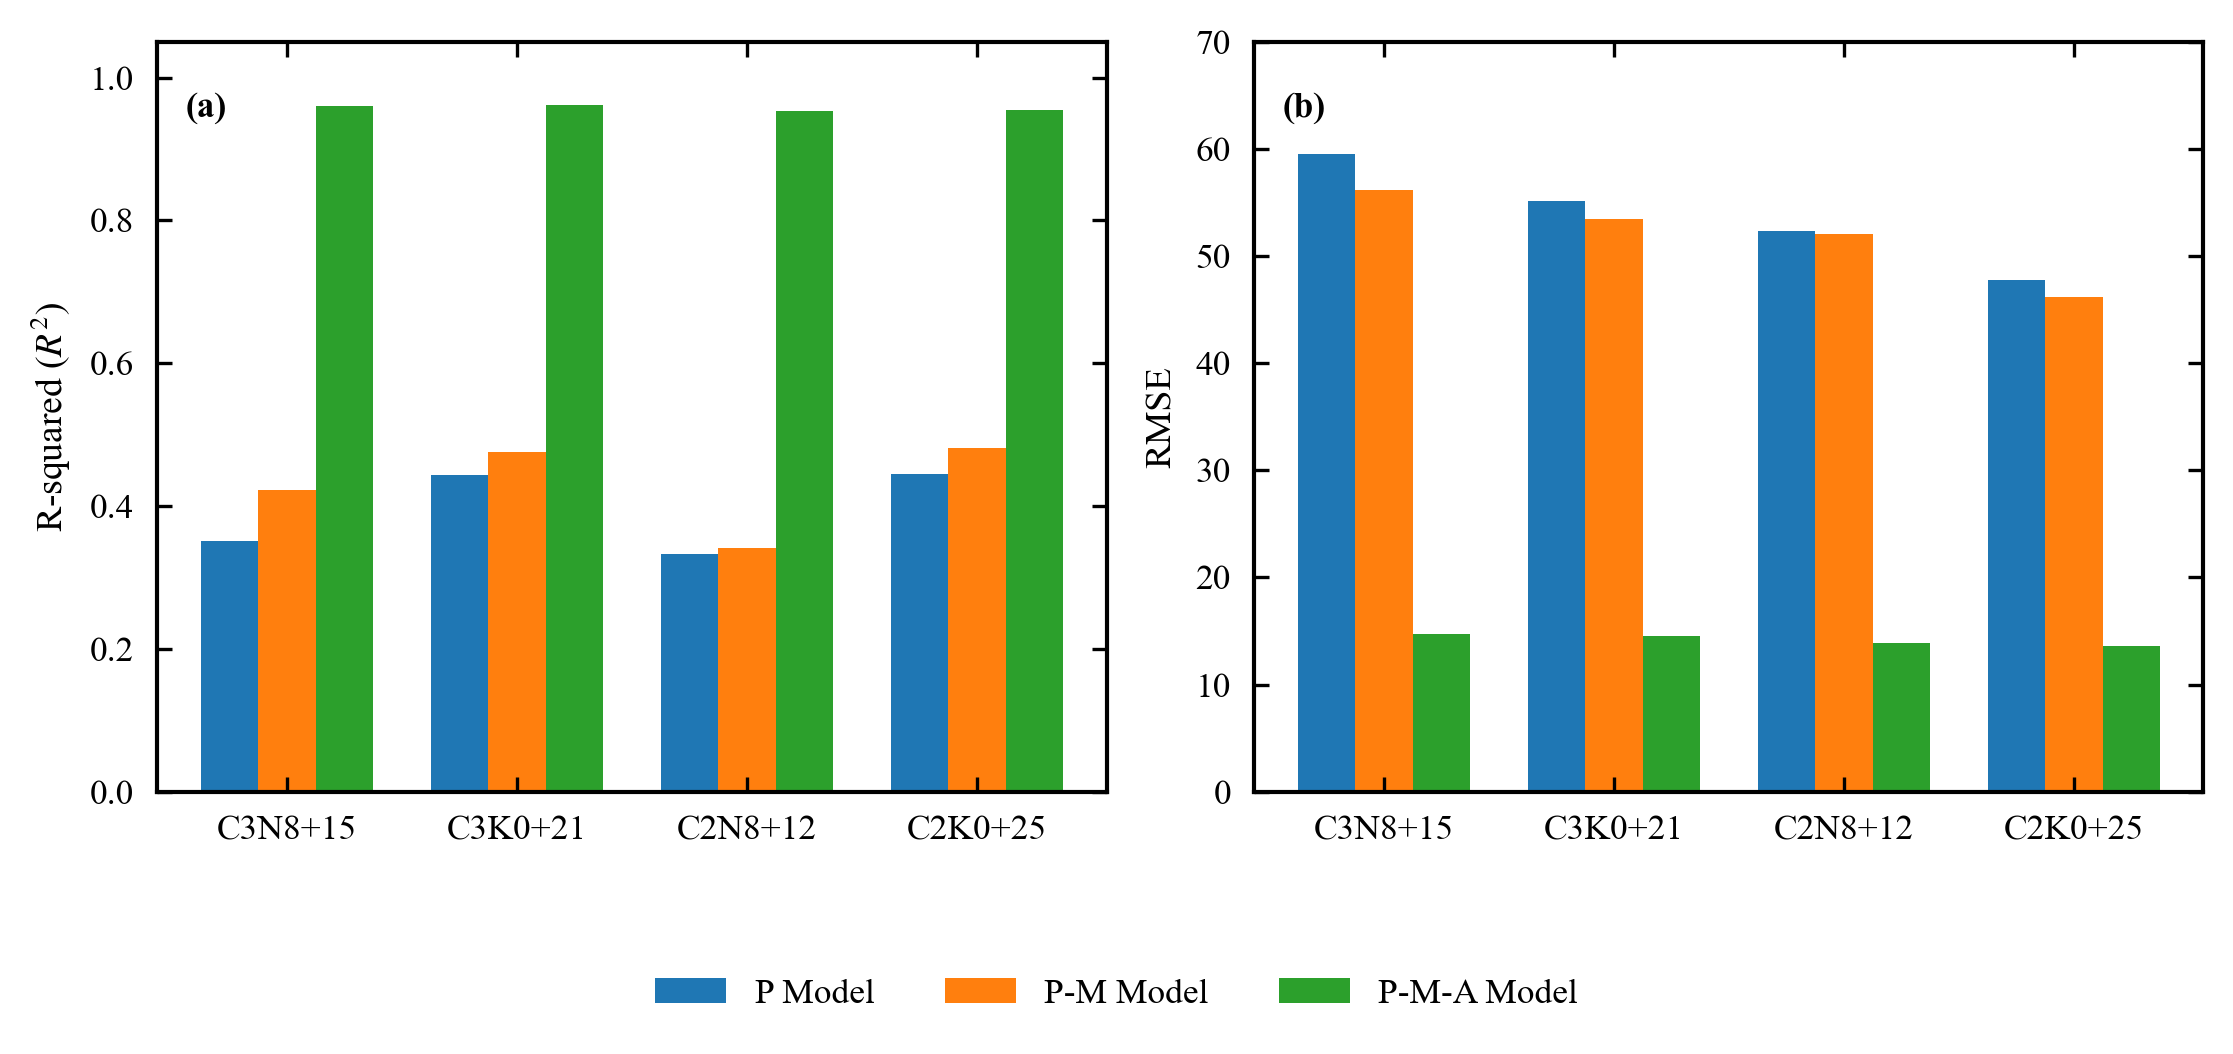


Plotting completed. Saved as: ../../results/05_p_m_a_model/Fig08_model_performance_comparison.eps


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import os # Recommended to import os module

# --- 1. Style Function (*** Updated to final journal style ***) ---
def setup_astro_style():
    """
    Sets a global Matplotlib style suitable for astronomical academic journals.
    (Optimized for 7.5-inch width, 8.5pt base font)
    """
    # Try using 'seaborn-v0_8-paper' style
    try:
        plt.style.use('seaborn-v0_8-paper')
    except IOError:
        print("Warning: 'seaborn-v0_8-paper' style not found. Using 'seaborn-paper' instead.")
        try:
            plt.style.use('seaborn-paper')
        except IOError:
            print("Warning: 'seaborn-paper' style not found. Using default style.")
            
    # Filter out Matplotlib font warnings
    warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

    # Comprehensive adjustment of global chart parameters (Using agreed 8.5pt font size)
    plt.rcParams.update({
        'font.size': 8.5, 'axes.labelsize': 9, 'axes.titlesize': 10,
        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5, 'legend.fontsize': 8.5,
        'font.family': 'serif', 'font.serif': ['Times New Roman'], 
        'mathtext.fontset': 'stix', 
        'axes.unicode_minus': False, 
        'xtick.direction': 'in', 'ytick.direction': 'in', 
        # (Fixed xtick.left -> ytick.left)
        'xtick.top': True, 'xtick.bottom': True, 'ytick.left': True, 'ytick.right': True, 
        'axes.linewidth': 1.0, 
        'lines.linewidth': 1.2, # Unified line width
        'figure.dpi': 300, 
        'savefig.dpi': 300, 
        'savefig.bbox': 'tight',
    })

# --- 2. Data Preparation (Same as original) ---
# Raw Data
data = {
    'M8+3': [0.3510, 59.5218, 0.4227, 56.1349, 0.9601, 14.7577, 0.3903, 51.2239, 0.4252, 49.7356, 0.9539, 14.0922],
    'M0+3': [0.4431, 55.1335, 0.4762, 53.4715, 0.9615, 14.4904, 0.3309, 53.6612, 0.3285, 53.7562, 0.9551, 13.9034],
    'M8+2': [0.3326, 52.3657, 0.3406, 52.0538, 0.9533, 13.8583, 0.6451, 39.0805, 0.6204, 40.4204, 0.9549, 13.9270],
    'M0+2': [0.4448, 47.7607, 0.4811, 46.1743, 0.9552, 13.5635, -1.2206, 97.7557, -1.2698, 98.8323, 0.9444, 15.4653]
}
# Index (Metric Names)
index = [
    'P_V2_R2', 'P_V2_RMSE',
    'PM_V2_R2', 'PM_V2_RMSE',
    'PMA_V2_R2', 'PMA_V2_RMSE',
    'P_O3_R2', 'P_O3_RMSE',
    'PM_O3_R2', 'PM_O3_RMSE',
    'PMA_O3_R2', 'PMA_O3_RMSE'
]
# Create DataFrame
df = pd.DataFrame(data, index=index)

# Final Model Name Mapping
model_final_names = {'M8+3': 'C3N8+15', 'M0+3': 'C3K0+21', 'M8+2': 'C2N8+12', 'M0+2': 'C2K0+25'}
df = df.rename(columns=model_final_names)

# Ensure Column Order
ordered_final_names = ['C3N8+15', 'C3K0+21', 'C2N8+12', 'C2K0+25']
df = df[ordered_final_names]

# --- 3. Extract V2 (Test Set) Data (Same as original) ---
models = ordered_final_names
stages_labels = ['P Model', 'P-M Model', 'P-M-A Model']

# V2 (Test Set) Data
r2_v2_p = df.loc['P_V2_R2'].values
r2_v2_pm = df.loc['PM_V2_R2'].values
r2_v2_pma = df.loc['PMA_V2_R2'].values

rmse_v2_p = df.loc['P_V2_RMSE'].values
rmse_v2_pm = df.loc['PM_V2_RMSE'].values
rmse_v2_pma = df.loc['PMA_V2_RMSE'].values

# --- 4. Plotting: 1x2 Combined Chart (V2 Only) ---

print("Generating 1x2 (V2 only) combined performance chart...")
# Set academic style
setup_astro_style()

# Create a 1x2 subplot grid, size (7.5, 3.5) is reasonable, kept as is
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7.5, 3.5))

n_models = len(models)
bar_width = 0.25
index = np.arange(n_models)
pos1 = index - bar_width
pos2 = index
pos3 = index + bar_width

# Colors (No transparency)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Matplotlib C0, C1, C2

# --- Subplot (a): Test Set (V2) R² ---
ax1.bar(pos1, r2_v2_p, bar_width, label=stages_labels[0], color=colors[0])
ax1.bar(pos2, r2_v2_pm, bar_width, label=stages_labels[1], color=colors[1])
ax1.bar(pos3, r2_v2_pma, bar_width, label=stages_labels[2], color=colors[2])
ax1.set_ylabel('R-squared ($R^2$)')
# ax1.set_title('Test Set Performance - $R^2$')
ax1.set_xticks(index)
ax1.set_xticklabels(models)
ax1.set_ylim(0, 1.05)
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
# *** Modification: Removed fontsize=12 ***
ax1.text(0.03, 0.9, '(a)', transform=ax1.transAxes, fontweight='bold')

# --- Subplot (b): Test Set (V2) RMSE (Linear Scale) ---
ax2.bar(pos1, rmse_v2_p, bar_width, label=stages_labels[0], color=colors[0])
ax2.bar(pos2, rmse_v2_pm, bar_width, label=stages_labels[1], color=colors[1])
ax2.bar(pos3, rmse_v2_pma, bar_width, label=stages_labels[2], color=colors[2])
ax2.set_ylabel('RMSE') # Label changed to 'RMSE'
# ax2.set_title('Test Set Performance - RMSE')
ax2.set_xticks(index)
ax2.set_xticklabels(models)
ax2.set_ylim(0, 70) 
# *** Modification: Removed fontsize=12 ***
ax2.text(0.03, 0.9, '(b)', transform=ax2.transAxes, fontweight='bold')

# --- Unified Legend ---
handles, labels = ax1.get_legend_handles_labels()
# (Font size controlled automatically by rcParams: legend.fontsize)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)

# Adjust layout to make room for legend
plt.tight_layout(rect=[0, 0.1, 1, 0.95]) # rect=[left, bottom, right, top]

# Save Figure
eps_file = '../../results/05_p_m_a_model/Fig08_model_performance_comparison.eps'
plt.savefig(eps_file, format='eps', dpi=300, bbox_inches='tight') # Explicitly specify format and dpi

# *** Modification: Commented out plt.show() ***
plt.show()

print(f"\nPlotting completed. Saved as: {eps_file}")